# Ford GoBike System Data Exploration

## Table of Contents
<ul>
    <ul>
        <li><a href="#gather">Data Gathering & Assessing</a></li>
        <li><a href="#clean">Data Cleaning</a></li>
        <li><a href="#exp">Data Exploration</a></li>
        <ul>
        <li><a href="#uni">Univariate Exploration</a></li>
        <li><a href="#bi">Bivariate Exploration</a></li>
        <li><a href="#mul">Multivariate Exploration</a></li>
        </ul>
    </ul>    
</ul>


In [102]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import cufflinks as cf
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode , plot , iplot
import dash
from dash import dcc
from dash import html
init_notebook_mode(connected=True)
cf.go_offline()

sb.set_style('darkgrid')
%matplotlib inline


<a id='gather'></a>
## Data Gathering & Assessing

I have chose 2017 Ford GoBike System Dataset which consists of six months bike rides data(Jun-Dec). Find the Data set [here](https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv)

In [103]:
# Read data from csv file and Load it into dataframe    
ford_df = pd.read_csv('2017-fordgobike-tripdata.csv')
ford_df.head()

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   

   end_station_longitude  bike_id   user_type  member_birth_year member_gender  
0            -122.415929       96    Customer             1987.0          Male  
1            -122.426614       88    Customer             1965.0        Female  
2            -122.267764     1094    Customer                NaN           NaN  
3            -122.408445     2831    Customer                NaN           NaN  
4            -122.265896     3167  Subscriber             1997.0        Female

In [104]:
# high-level overview of data shape and composition
ford_df.shape

(519700, 15)

In [105]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [106]:
#check for duplicated values
ford_df.duplicated().sum()

0

In [107]:
#check for null values
ford_df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

**Observations:**
- Missing values in the dataset
- Erreneous data types:
    - *start_time* and *end_time* types are object instead of datetime type
    - *member_birth_year* should be type of int
    - *start_station_id*, *end_station_id*, and *bike_id* can be str type
    - *user_type* and *member_gender* can be type of category
- Unwanted columns

<a id='clean'></a>
## Data Cleaning

In [108]:
# Before cleaning, make copy of original datasets
ford_clean = ford_df.copy()

**Issue 1: Missing values in the dataset** 

**Define**
Drop the null values from the dataset

**Code:**

In [109]:
#drop the null values from dataset
ford_clean.dropna(how = 'any', axis = 0, inplace=True)

**Test**

In [110]:
# check whether null values are dropped
ford_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

**Issue 2: Erreneous data types**

**Define**
- convert *start_time* and *end_time* types from object to datetime
- convert *member_birth_year* type from float to int
- convert *start_station_id*, *end_station_id*, and *bike_id* to str type
- Convert *user_type* and *member_gender* to type of category

**Code:**

In [111]:
# convert the data type of start_time and end_time to datetime.
ford_clean.start_time = pd.to_datetime(ford_clean.start_time)
ford_clean.end_time = pd.to_datetime(ford_clean.end_time)

# convert member_birth_year from float64 to int
ford_clean.member_birth_year = ford_clean.member_birth_year.astype(int)

# convert ids from object to str
ford_clean.start_station_id = ford_clean.start_station_id.astype(str)
ford_clean.end_station_id = ford_clean.end_station_id.astype(str)
ford_clean.bike_id = ford_clean.bike_id.astype(str)


# convert user_type and member_gender datatype into category
ford_clean.user_type = ford_clean.user_type.astype('category')
ford_clean.member_gender = ford_clean.member_gender.astype('category')



**Test**

In [112]:
# check whether data type are converted correctly
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             453159 non-null  int64         
 1   start_time               453159 non-null  datetime64[ns]
 2   end_time                 453159 non-null  datetime64[ns]
 3   start_station_id         453159 non-null  object        
 4   start_station_name       453159 non-null  object        
 5   start_station_latitude   453159 non-null  float64       
 6   start_station_longitude  453159 non-null  float64       
 7   end_station_id           453159 non-null  object        
 8   end_station_name         453159 non-null  object        
 9   end_station_latitude     453159 non-null  float64       
 10  end_station_longitude    453159 non-null  float64       
 11  bike_id                  453159 non-null  object        
 12  user_type       

**Feature Engineering**

To make the analysis easy, lets fetch time of day, day of the week, or month of the year from *start_time*

In [113]:
# use strftime() method to scrap the time data
ford_clean['start_day'] = ford_clean['start_time'].apply(lambda x: x.strftime('%A')).astype('category')
ford_clean['start_month'] = ford_clean['start_time'].apply(lambda x: x.strftime('%b')).astype('category')
ford_clean['start_hour'] = ford_clean['start_time'].apply(lambda x: x.strftime('%H')).astype(int)
ford_clean['year_month'] = ford_clean['start_time'].dt.to_period('M')

# Lets calcluate the member age from the birthyear
ford_clean['member_age'] = 2022 - ford_clean['member_birth_year']

In [114]:
# Brief summary of cleaned DataFrame
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             453159 non-null  int64         
 1   start_time               453159 non-null  datetime64[ns]
 2   end_time                 453159 non-null  datetime64[ns]
 3   start_station_id         453159 non-null  object        
 4   start_station_name       453159 non-null  object        
 5   start_station_latitude   453159 non-null  float64       
 6   start_station_longitude  453159 non-null  float64       
 7   end_station_id           453159 non-null  object        
 8   end_station_name         453159 non-null  object        
 9   end_station_latitude     453159 non-null  float64       
 10  end_station_longitude    453159 non-null  float64       
 11  bike_id                  453159 non-null  object        
 12  user_type       

**Storing cleaned Dataset :**

In [115]:
ford_clean.to_csv('cleaned-fordgobike-tripdata-2017.csv', encoding='utf-8', index=False)

**Note:** Dataset isn't completely polished

In [116]:
# Read data from csv file and Load it into dataframe
df = pd.read_csv('cleaned-fordgobike-tripdata-2017.csv')
df.sample(2)

duration_sec               start_time                 end_time  \
187874           411  2017-10-24 18:26:56.347  2017-10-24 18:33:47.659   
278453          2308  2017-09-25 10:28:18.643  2017-09-25 11:06:46.772   

        start_station_id           start_station_name  start_station_latitude  \
187874               184       Franklin St at 14th St               37.803765   
278453                59  S Van Ness Ave at Market St               37.774814   

        start_station_longitude  end_station_id             end_station_name  \
187874              -122.269988             180     Telegraph Ave at 23rd St   
278453              -122.418954              59  S Van Ness Ave at Market St   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
187874             37.812678            -122.268773      380  Subscriber   
278453             37.774814            -122.418954     1904  Subscriber   

        member_birth_year member_gender start_day start_month  start_hour  \
187874               1975          Male   Tuesday         Oct          18   
278453               1989          Male    Monday         Sep          10   

       year_month  member_age  
187874    2017-10          47  
278453    2017-09          33

<a id='exp'></a>
## Data Exploration
### What is the structure of your dataset?

> The dataset consists of 453159 bike ride entries and 15 features

| Features| dtypes |
| --- | --- |
| duration_sec | int64 |
| start_time | datetime64[ns] |
| end_time | datetime64[ns] |
| start_station_id | object |
| start_station_name| object |
| end_station_id | object |
| end_station_name | object |
| bike_id | object |
| user_type | category |
| member_birth_year | int32 |
| member_gender | category |
| start_day | category |
| start_month | category|
| start_hour | int32 |
| member_age | int32 |

### What is/are the main feature(s) of interest in your dataset?

> - Most interested features in this dataset are bike ride start_time (in terms of month of the year, day of the week, or hour of the day) and ride duration. Does it depends on characteristics of the riders?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect *time_characteristics* and *duration_sec* highly depends on below characteristics of the riders,
> - *user_type*
> - *member_gender*
> - *member_age*

<a id='uni'></a>
## Univariate Exploration

> Let's investigate and explore the distributions of individual variables.

In [117]:
df=df.sample(5000)

In [118]:
# set the default color
default_color = sb.color_palette()[0]

**Distribution of Day, Month and Hour of start time**

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 414511 to 115831
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             5000 non-null   int64  
 1   start_time               5000 non-null   object 
 2   end_time                 5000 non-null   object 
 3   start_station_id         5000 non-null   int64  
 4   start_station_name       5000 non-null   object 
 5   start_station_latitude   5000 non-null   float64
 6   start_station_longitude  5000 non-null   float64
 7   end_station_id           5000 non-null   int64  
 8   end_station_name         5000 non-null   object 
 9   end_station_latitude     5000 non-null   float64
 10  end_station_longitude    5000 non-null   float64
 11  bike_id                  5000 non-null   int64  
 12  user_type                5000 non-null   object 
 13  member_birth_year        5000 non-null   int64  
 14  member_gender    

In [120]:
px.bar(df,x='start_day',labels=dict(start_day="Day of the week"))


In [121]:
px.bar(df,x='start_month')


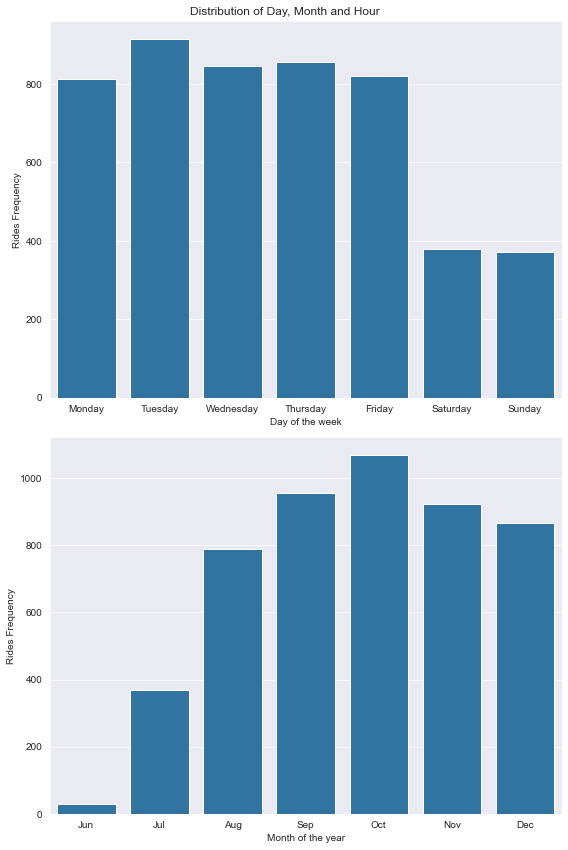

In [122]:
# set subplots
fig, ax = plt.subplots(nrows=2, figsize = [8,12])

# time characteristic order
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hour_order = np.arange(0,24)

# plot the Day, Month and Hour
sb.countplot(data = df, x = 'start_day', color = default_color, ax = ax[0], order = day_order, label = 'data')
sb.countplot(data = df, x = 'start_month', color = default_color, ax = ax[1], order = month_order)

# title and labels
fig.suptitle('Distribution of Day, Month and Hour');

for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[1].set_xlabel('Month of the year')

fig.tight_layout();

- **Weekdays** has higher ride counts rather than **weekend**. Especially ride count for mid three days of the week (Tue, Wed, Thurs) ranges between 75k and 80k. It makes sense that because of the working schedule.
- More number of rides commuted in **October** month. **July** ride counts are very low, it might because of the launch of the program. 


**Distribution of user_type and member_gender**

In [123]:
px.bar(df, x='user_type')

In [124]:
px.bar(df, x='member_gender',color_discrete_sequence=['black'])

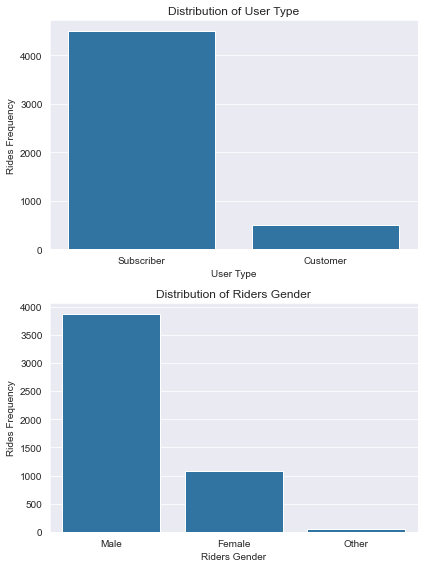

In [125]:
fig, ax = plt.subplots(nrows=2, figsize = [6,8])

sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[1]);

# title and labels
for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('User Type')
ax[0].set_title('Distribution of User Type')
ax[1].set_xlabel('Riders Gender')
ax[1].set_title('Distribution of Riders Gender')
fig.tight_layout();

- **Subcribers** have done more number of rides rather than **Customers**. As subscribed member ride price is less than casual customers, this might be the reason for more number of rides. Refer [Bay_Wheels_wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels).
- **Male** riders counts are three times more than the **Female** riders. **Other** gender type is verly less when compared to other genders

**Distribution of Ride duration**

In [126]:
filter_=df[df['duration_sec'] <=3000]
fig = px.histogram(filter_, x="duration_sec",nbins=100)
fig.show()

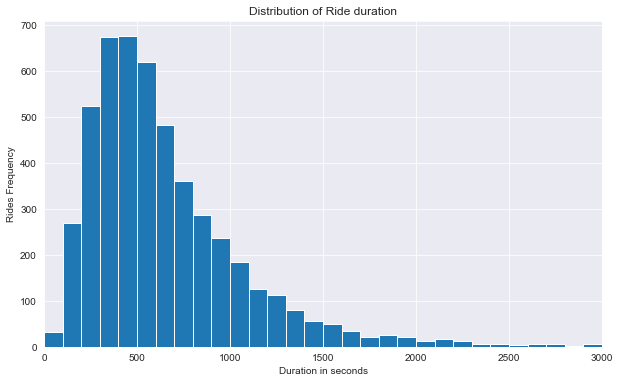

In [127]:
plt.figure(figsize=(10,6))

# set bins
bins = np.arange(0, df.duration_sec.max()+100, 100)

# plot the distribution
plt.hist(data = df, x = 'duration_sec', bins = bins)

# set limits to make the appropriate plot
plt.xlim(0,3000);

# title and labels
plt.title('Distribution of Ride duration')
plt.xlabel('Duration in seconds')
plt.ylabel('Rides Frequency');

- Distribution of ride duration has long tail and right skewed. Let's do the scale tranformation.

In [128]:
# Log tranformation description of ride duartion
np.log10(df.duration_sec.describe())

count    3.698970
mean     2.928066
std      3.450809
min      1.785330
25%      2.558709
50%      2.741939
75%      2.920775
max      4.915421
Name: duration_sec, dtype: float64

In [129]:
filter_=df[df['duration_sec'] <=3000]
fig = px.histogram(filter_, x="duration_sec",nbins=100,log_x=True)
fig.update_xaxes(type="log", range=[0,5]) # log range: 10^0=1, 10^5=100000
fig.show()


In [130]:
# set bins
bins = 10 ** np.arange(1.5, np.log10(df.duration_sec.max())+0.05, 0.05)

# plot the distribution
plt.figure(figsize=(10,6))
plt.hist(data = df, x = 'duration_sec', bins = bins)

# log scale transformation
plt.xscale('log')

# set title, lbels and ticks
plt.xticks([50,100,250,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,250,500, '1k', '2k', '5k', '10k', '20k'])
plt.title('Log scale Distribution of Ride duration')
plt.xlabel('Duration in seconds')
plt.ylabel('Rides Frequency');

- After log scale tranformation, distribution of ride duration looks **unimodal** and normally distributed. Peak trip duration falls in the range **300 - 1000** seconds.

**Distribution of Memebrs Age**

In [131]:
px.box(filter_, x='member_age')

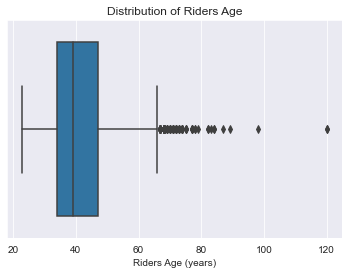

In [132]:
# plot the distribution
sb.boxplot(data = df, x='member_age')

# set title
plt.title('Distribution of Riders Age')
plt.xlabel('Riders Age (years)');

In [133]:
df.member_birth_year.describe()

count    5000.000000
mean     1980.518400
std        10.160035
min      1902.000000
25%      1975.000000
50%      1983.000000
75%      1988.000000
max      1999.000000
Name: member_birth_year, dtype: float64

- We could see that age has more number of outliers as ages are greater than 100 which is exceptional where the bike riders birth year below 1917. So, Let's consider members whose age is below 60

In [134]:
# Remove the outliers where age greater than 60
df = df[df.member_age <= 60]

In [135]:
fig = px.histogram(df, x="member_age",nbins=100)
fig.show()



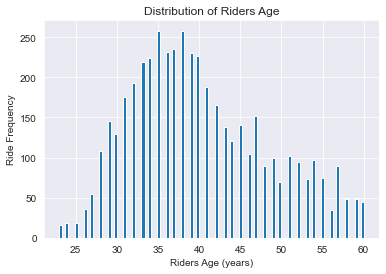

In [136]:
# plot the distribution
plt.hist(data = df, x = 'member_age',bins=100)

# set title
plt.title('Distribution of Riders Age')
plt.xlabel('Riders Age (years)')
plt.ylabel('Ride Frequency');

- Most of riders age lies between **29 - 42** age range which indicates riders age infulences the ride frequency. Older age riders commuting less.

**Busy ride start stations**

In [137]:
filter_=df.start_station_name.value_counts()[:10].sort_values()
px.bar(filter_, orientation='h')

In [138]:
plt.figure(figsize=(8,6))

# Top 10 peak start stations
counts_start = df.start_station_name.value_counts().nlargest(10)

# slice top 10 data
station_start = df.loc[df.start_station_name.isin(counts_start.index)]

# plot the stations
sb.countplot(data = station_start, y = 'start_station_name', color = default_color, order = counts_start.index);
plt.title('Top 10 Busy start stations')
plt.xlabel('Ride Counts')
plt.ylabel('Start Stations');

- Most commuted start stations are **San Francisco Caltrain (Townsend St at 4th St)**, **San Francisco Caltrain Station 2  (Townsend St at 4th St)** and **San Francisco Ferry Building (Harry Bridges Plaza)**

In [139]:
filter_=df.end_station_name.value_counts()[:10].sort_values()
px.bar(filter_, orientation='h')

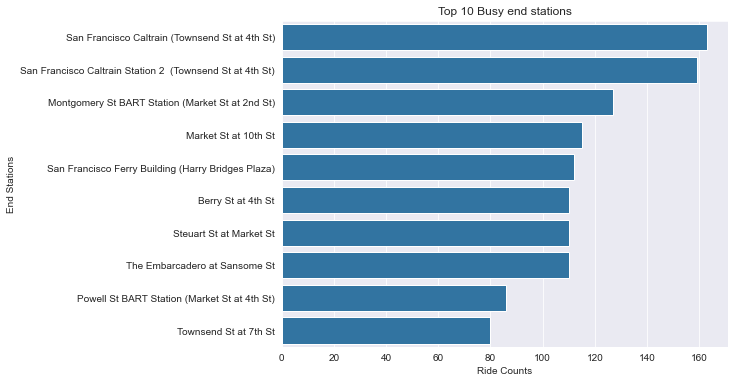

In [140]:
plt.figure(figsize=(8,6))

# Top 10 peak end stations
counts_end = df.end_station_name.value_counts().nlargest(10) 

# slice top 10 data
station_end = df.loc[df.end_station_name.isin(counts_end.index)]

# plot the stations
sb.countplot(data = station_end, y = 'end_station_name', color = default_color, order = counts_end.index)

# set title and label
plt.title('Top 10 Busy end stations')
plt.xlabel('Ride Counts')
plt.ylabel('End Stations');

- Most commuted end stations are **San Francisco Caltrain (Townsend St at 4th St)**, **San Francisco Ferry Building (Harry Bridges Plaza)** and **San Francisco Caltrain Station 2  (Townsend St at 4th St)**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- As per the univariate exploration, higher rides are commuted during 8-9 AM and 4-6 PM , weekdays and October month. Riders who are subscribed, male gender and age range between 29-42 has did more number of rides.
- Actual Ride duration has long tail right skewed distribution. For better undersatnding, performed log scale transformation on *duartion_sec*. From the scale distribution its evident that ride duration is normaly distributed unimodel.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Most of the data quality and tidiness issues were cleaned in the data cleaning phase.
- Distribution of riders age had unsual distributions which contains more number of outliers. As, we chose 2017 dataset, member age contains ages more than 100 which is exceptional. To avoid this, I have ignored the age range above 60.
- San Francisco Caltrain (Townsend St at 4th St) is the most commuted start station as well as the end station

<a id='bi'></a>
## Bivariate Exploration

> Lets investigate and explore relationships between pairs of variables.

**Relationship between time characteristics and user type**

In [141]:
px.bar(df,x='start_day',color='user_type', barmode="group" )


In [142]:
px.bar(df,x='start_month',color='user_type', barmode="group" )


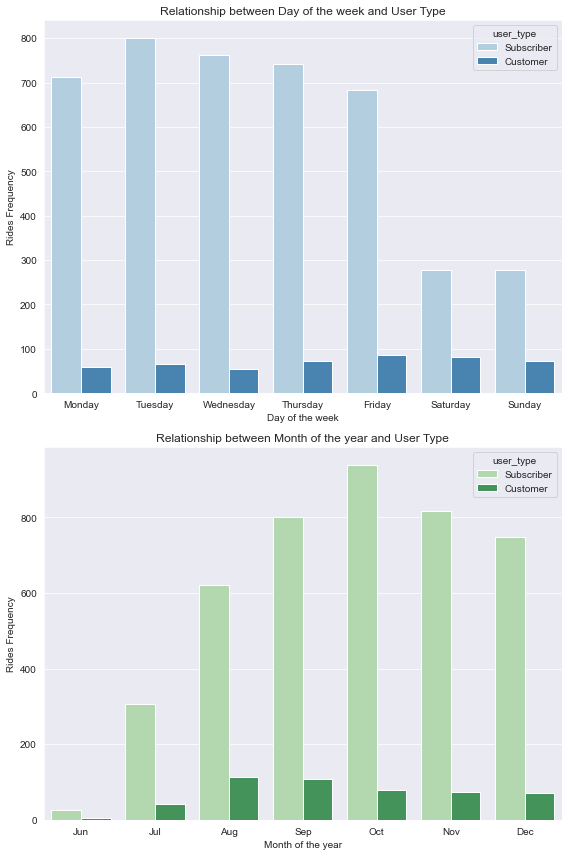

In [143]:
# set subplots
fig, ax = plt.subplots(nrows=2, figsize = [8,12])

# plot the relationship
sb.countplot(data = df, x = 'start_day', hue = 'user_type', ax = ax[0], order = day_order, palette = 'Blues')
sb.countplot(data = df, x = 'start_month', hue = 'user_type', ax = ax[1], order = month_order, palette = 'Greens')

# title and labels
for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Day of the week and User Type')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Month of the year and User Type')


fig.tight_layout();

- Subscribed member riders are making more number of rides in weekdays.
- In winter season, subscribed member riders are making more number of rides.
- Subscribed member riders are making more number of rides during peak hours 8-9 AM and 4-6 PM.
- Casual customer riders counts are far less than subscribed riders

**Relationship between time characteristics and Rider Gender**

In [144]:
px.bar(df,x='start_day',color='member_gender', barmode="group" )


In [145]:
px.bar(df,x='start_month',color='member_gender', barmode="group" )


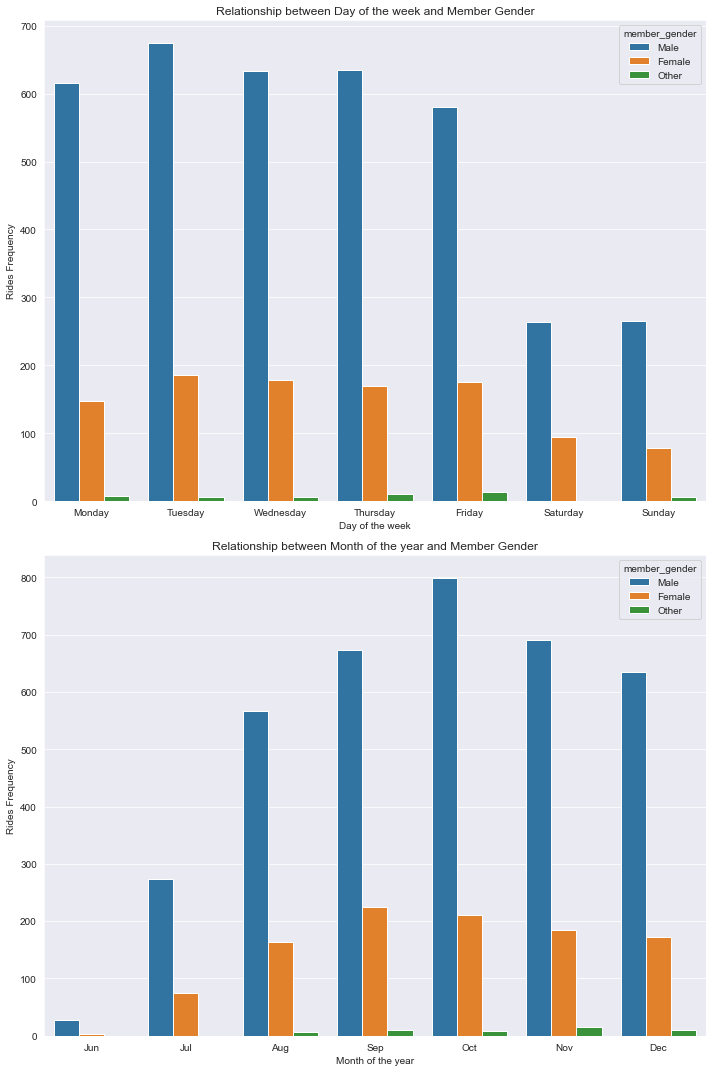

In [146]:
# set subplots
fig, ax = plt.subplots(nrows=2, figsize = [10,15])

# plot the relationship
sb.countplot(data = df, x = 'start_day', hue = 'member_gender', ax = ax[0], order = day_order)
sb.countplot(data = df, x = 'start_month', hue = 'member_gender', ax = ax[1], order = month_order)

# title and labels
for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Day of the week and Member Gender')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Month of the year and Member Gender')


fig.tight_layout();

- Number of rides are greater for Males and lower for other
- Males are making more number of rides in weekdays rather than weekends.
- In winter season, Males are making more number of rides.


**Relationship between time characteristics and Rider Age**

In [147]:
fig = go.Figure()

days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday','Monday','Saturday','Sunday']

for day in days:
    fig.add_trace(go.Violin(x=df['start_day'][df['start_day'] == day],
                            y=df['member_age'][df['start_day'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))
fig.show()    

In [148]:
fig = go.Figure()

months = ['Sep', 'Aug', 'Oct', 'Dec', 'Nov', 'Jul', 'Jun']
for month in months:
    fig.add_trace(go.Violin(x=df['start_month'][df['start_month'] == month],
                            y=df['member_age'][df['start_month'] == month],
                            name=month,
                            box_visible=True,
                            meanline_visible=True))
fig.show()    

In [149]:
fig = go.Figure()

Hours =np.arange(0,24)

for Hour in Hours:
    fig.add_trace(go.Violin(x=df['start_hour'][df['start_hour'] == Hour],
                            y=df['member_age'][df['start_hour'] == Hour],
                            name=str(Hour),
                            box_visible=True,
                            meanline_visible=True))
fig.show()    

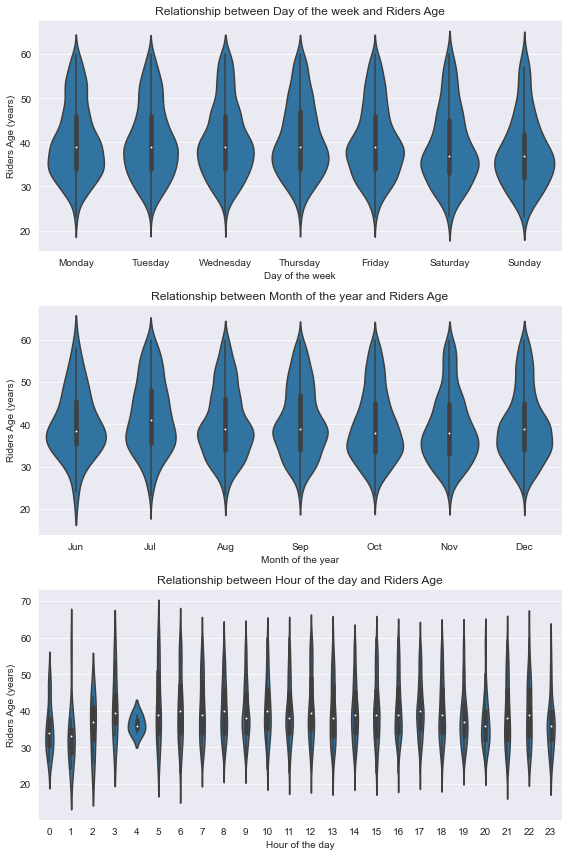

In [150]:
# set subplots
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

# plot relationship
sb.violinplot(data = df, x = 'start_day', y = 'member_age', ax = ax[0], order = day_order, color = default_color)
sb.violinplot(data = df, x = 'start_month', y = 'member_age', ax = ax[1], order = month_order, color = default_color)
sb.violinplot(data = df, x = 'start_hour', y = 'member_age', ax = ax[2], order = hour_order, color = default_color);

# title and labels
for a in ax:
    a.set_ylabel('Riders Age (years)')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Day of the week and Riders Age')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Month of the year and Riders Age')
ax[2].set_xlabel('Hour of the day')
ax[2].set_title('Relationship between Hour of the day and Riders Age')

fig.tight_layout();

- All age group riders are **uniformly** commuting during weekday, month of the year and hour of the day.

**Relationship between Ride duration and Rider characteristics**

In [151]:
df['duration_sec'].sum()

4041707

In [152]:
px.bar(df,x='member_gender',y='duration_sec')


In [153]:
px.bar(df,x='user_type',y='duration_sec')


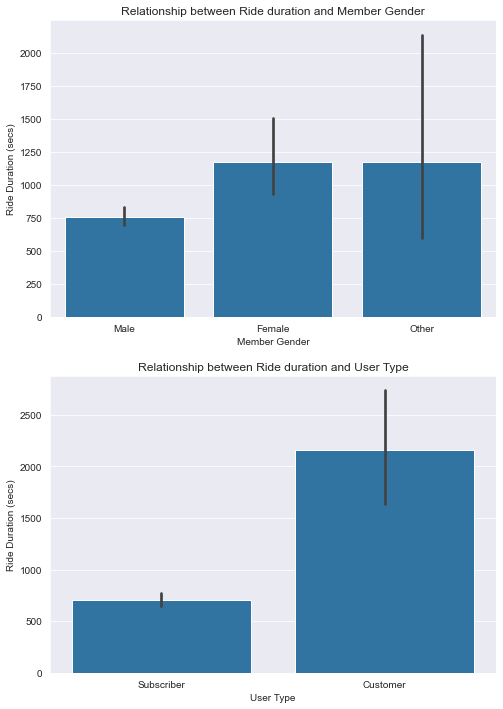

In [154]:
# set sunplots
fig, ax = plt.subplots(nrows=2, figsize = [8,12])

# plot relationship between Ride duration and Rider Member Gender,User Type 
sb.barplot(data = df, y = 'duration_sec', x = 'member_gender', ax = ax[0], color = default_color)
sb.barplot(data = df, y = 'duration_sec', x = 'user_type', ax = ax[1], color = default_color)

# title and labels
for a in ax:
    a.set_ylabel('Ride Duration (secs)')
    
ax[0].set_xlabel('Member Gender')
ax[0].set_title('Relationship between Ride duration and Member Gender')
ax[1].set_xlabel('User Type')
ax[1].set_title('Relationship between Ride duration and User Type');

- Comparing to ride frequency, ride duration is higher for **Females** and **Other** genders rather than **Males** and **Customers** rather than **Subscribers**

In [155]:
px.scatter( df, x = 'member_age', y = 'duration_sec',animation_frame="start_month")

In [156]:
px.scatter(df, x="member_age", y="duration_sec")

In [157]:
# set figure size
plt.figure(figsize=(8,6))

# plot relationship between Ride duration and Rider Age
sb.scatterplot(data = df, x='member_age', y = 'duration_sec', alpha=0.2);

# set title and labels
plt.title('Relationship between Ride duration and Rider Age')
plt.ylabel('Ride duration (secs)')
plt.xlabel('Rider Age (years)');

- Surprisingly all age group riders has uniformly distributed ride durations which means older riders are riding fast as well as the younger riders ranges approximately below 20k seconds 

**Relationship between time characteristics and Ride Duration**

In [158]:
px.bar(df,x='start_day',y='duration_sec')


In [159]:
px.bar(df,x='start_month',y='duration_sec')


In [160]:
px.bar(df,x='start_hour',y='duration_sec')


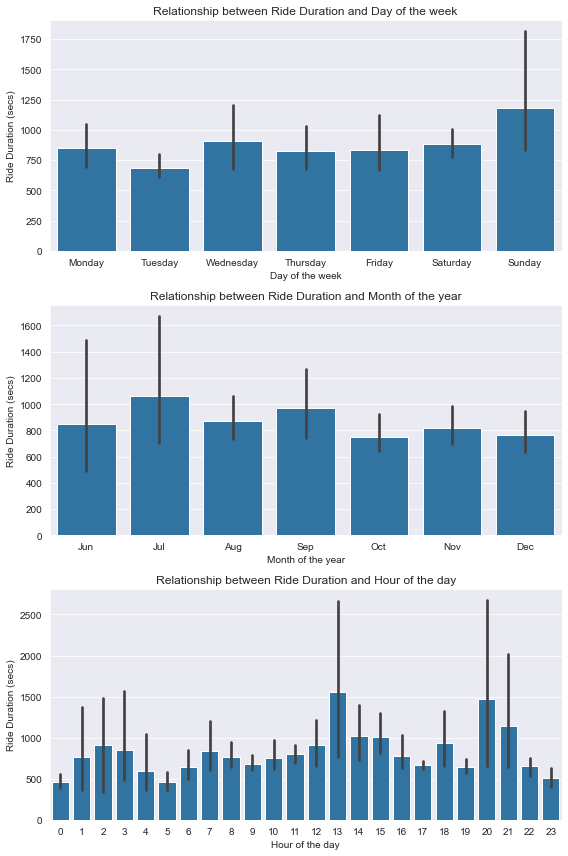

In [161]:
# set subplots
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

#plot relationship
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', ax = ax[0], order = day_order, color = default_color)
sb.barplot(data = df, x = 'start_month', y = 'duration_sec', ax = ax[1], order = month_order, color = default_color)
sb.barplot(data = df, x = 'start_hour', y = 'duration_sec', ax = ax[2], order = hour_order, color = default_color);

# title and labels
for a in ax:
    a.set_ylabel('Ride Duration (secs)')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Ride Duration and Day of the week')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Ride Duration and Month of the year')
ax[2].set_xlabel('Hour of the day')
ax[2].set_title('Relationship between Ride Duration and Hour of the day')

fig.tight_layout();

- Relationship between time characteristics and ride duartion is totally differs from Relationship between time characteristics and peak frequency rides.
- Weekends rides are taking more ride duration over Weekdays. July month and 3 AM has higher ride durations.  

**Relationship between Start Station and Ride duration**

In [162]:
# find average ride duration for start station and select top 10 start stations
station_start  = df.groupby('start_station_name')[['duration_sec']].mean().reset_index()
station_start = station_start.sort_values(['duration_sec'], ascending = False).head(10)
station_start

start_station_name  duration_sec
191        San Carlos St at 11th St  12483.333333
109  Foothill Blvd at Fruitvale Ave  11350.500000
173   O'Farrell St at Divisadero St  10770.250000
224   Telegraph Ave at Alcatraz Ave   8327.400000
246          Webster St at Grove St   6174.444444
112          Franklin St at 14th St   5541.812500
249              West St at 40th St   5481.200000
65            Berkeley Civic Center   4095.800000
25             24th St at Market St   3223.166667
175             Page St at Scott St   3094.000000

In [163]:
px.bar(station_start.sort_values('duration_sec'),x='duration_sec',y='start_station_name', orientation='h')

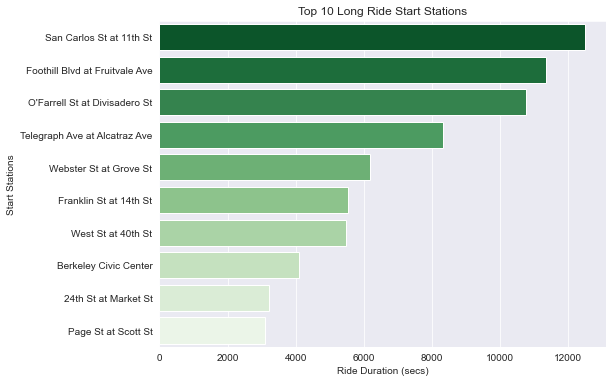

In [164]:
plt.figure(figsize=(8,6))

# plot the relationship
sb.barplot(x= 'duration_sec', y ='start_station_name', data = station_start, palette = "Greens_r");

# set title and label
plt.title('Top 10 Long Ride Start Stations')
plt.xlabel('Ride Duration (secs)')
plt.ylabel('Start Stations');

- Long ride duration start stations are **Foothill Blvd at Fruitvale Ave** and **Palm St at Willow St**

**Relationship between End Station and Ride duration**

In [165]:
# find average ride duration for end station and select top 10 end stations
station_end  = df.groupby('end_station_name')[['duration_sec']].mean().reset_index()
station_end = station_end.sort_values(['duration_sec'], ascending = False).head(10)

In [166]:
px.bar(station_end.sort_values('duration_sec'),x='duration_sec',y='end_station_name', orientation='h')

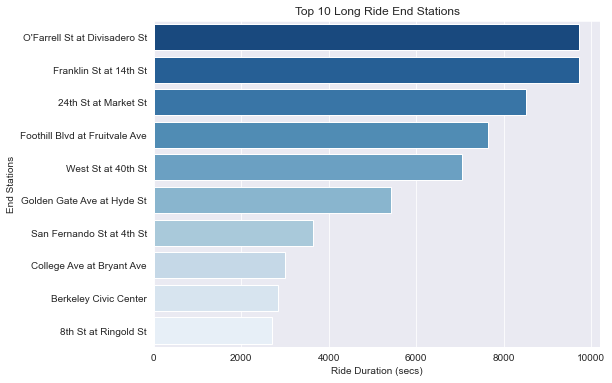

In [167]:
plt.figure(figsize=(8,6))

# plot the relationship
sb.barplot(x= 'duration_sec', y ='end_station_name', data = station_end, palette = "Blues_r");

# set title and label
plt.title('Top 10 Long Ride End Stations')
plt.xlabel('Ride Duration (secs)')
plt.ylabel('End Stations');

- Long ride duration end stations are **Foothill Blvd at Fruitvale Ave** and **Palm St at Willow St** 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Ride Frequency:
- **Peak times**(day: weekdays, month: Oct-Dec, hour: 8-9AM, 4-6PM)
- Male riders seems to commute the most during peak times.
- Most of the riders are member subscribers who commuted during peak times.
- All age group riders are uniformly commuting during peak times. There is no trend towards ride counts.

#### Ride Duration
- **Peak times**(day: weekends - month: Jul-Aug, hour: 3AM)
- Female riders are taking higher ride durations over Male and other genders.
- Similarly, casual customer are taking higher ride durations over member subscribers.
- All age group riders has uniformly distributed ride durations which means older riders are riding fast as well as the younger riders

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- I expected the rider age would impact the ride duration and ride frequency as we have older age riders. But, I observerd that rider age doesn't impacted the ride duartion. But ride frequency fairly correlated with rider age.
- Foothill Blvd at Fruitvale Ave and Palm St at Willow St are the long trip duration start stations as well as end stations.

<a id='mul'></a>
## Multivariate Exploration

> Lets investigate and explore relationships between multiple variables.

Here are some of the combinations we shall be exploring :
 1. user_type, start_month and trip duration in minutes (duration_min)
 2. user_type, start_day and trip duration in minutes
 3. user_type, start_hour and trip duration in minutes
 4. how the hourly usage varies during a week for Customers and Subscribers
 5. check distribution of trip duration over respectively start_day and top destination station
 
#### First we explore deeper the usage over the months:

In [168]:
df['duration_min']=df['duration_sec']/60

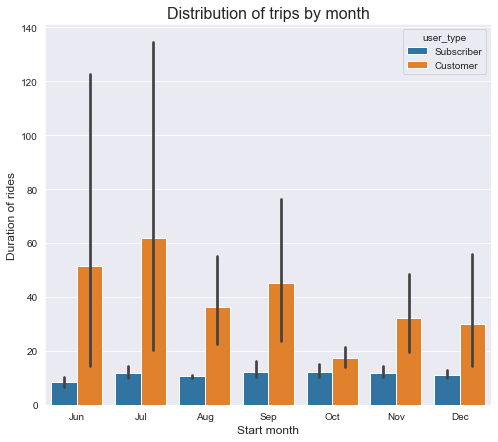

In [169]:
plt.figure(figsize=(8,7))
base_color = sb.color_palette()[1]

month_ranked = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month_ranked)
df['start_month'] = df['start_month'].astype(monthcat)

sb.barplot(data=df, x='start_month', y='duration_min', hue='user_type');

plt.xlabel('Start month', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by month", fontsize=16);

- Plot above shows that the most used month for the customer is June and not a really significant change in trip duration over the months to subscriber.
<br><br>
#### Secondly we check the trip duration profile over the days of the week:

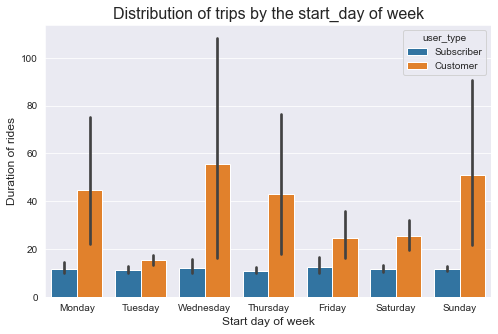

In [170]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day'] =df['start_day'].astype(weekdaycat)

sb.barplot(data=df, x='start_day', y='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);

- The clustered barchart above shows a significant higher trip duration during weekend days by Customers. 
- The duration between 35 - 40  minutes during weekend days, which is about 3% higher than the highest score during a weekday.

In [171]:
df.groupby(['start_day', 'user_type']) ['duration_min'].mean()

start_day  user_type 
Monday     Customer      44.699425
           Subscriber    11.673562
Tuesday    Customer      15.287626
           Subscriber    11.157437
Wednesday  Customer      55.740606
           Subscriber    12.150699
Thursday   Customer      43.027854
           Subscriber    10.948628
Friday     Customer      24.781783
           Subscriber    12.570864
Saturday   Customer      25.292387
           Subscriber    11.681415
Sunday     Customer      50.787731
           Subscriber    11.692026
Name: duration_min, dtype: float64

<br><br>
#### Thirdly we check the trip duration profile over the hours-of-the-day:

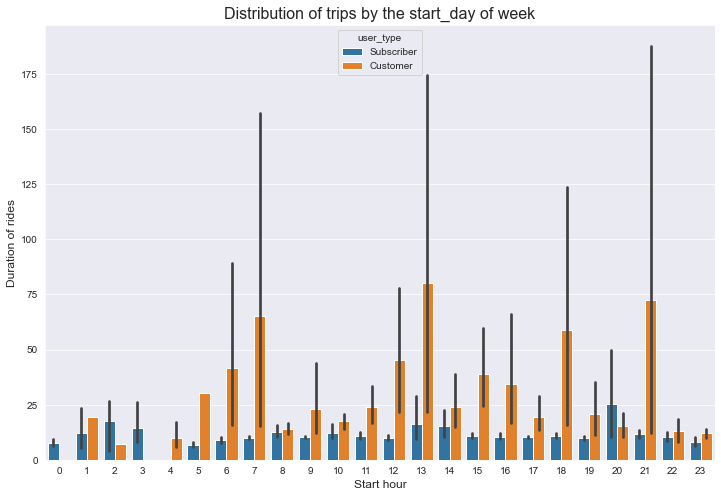

In [172]:
plt.figure(figsize=(12, 8))
base_color = sb.color_palette()[1]


sb.barplot(data=df, x='start_hour', y='duration_min', hue='user_type')
plt.xlabel('Start hour', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


- 3 am is the most time during which the type of user (customer) makes the trip.

#### Fourthly we analyse how the hourly usage varies during a week for Customers and Subscribers:

In [173]:
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')

subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')

In [183]:
fig = px.imshow(ct_counts,color_continuous_scale='blues')
fig.show()

In [175]:
fig = px.imshow(st_counts,color_continuous_scale='blues')
fig.show()

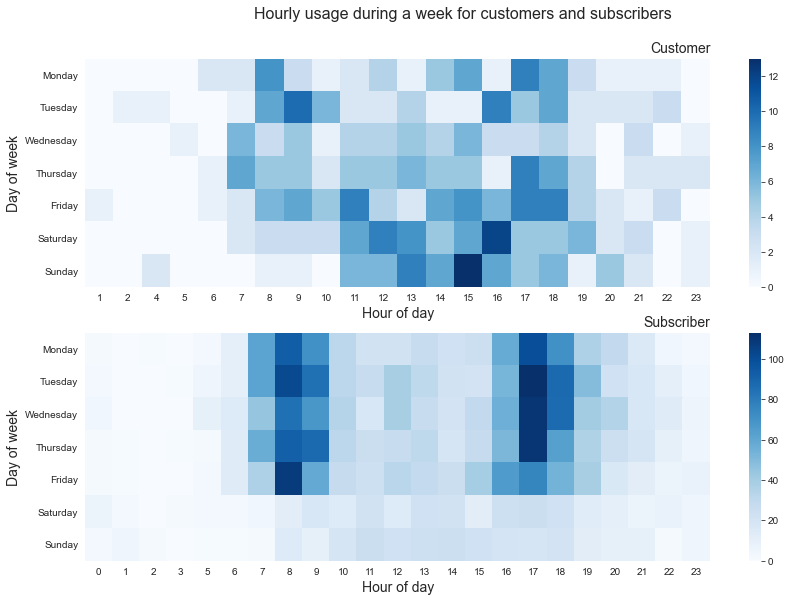

In [176]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);

- It is interesting, that Customers tend to use the bike service mostly on Saturday/Sunday from 12 PM to 5 PM, while Subscribers will likely have a trip from Monday to Friday during rush hours (8-9 AM, 17-18 PM).

**Relationship between time characteristics and Riders characteristics by ride Frequency**

- Subscribed Male riders are commuting more during weekdays(Tuesday & Wednesday: ~56k, Thursday: ~53k) whereas Other gender casual customers are commuting the least eternally.
- Subscribed Male riders are commuting more during October month(~65k).

#### Finally we check distribution of trip duration over respectively (start_day)  and top destination end_station_name:

In [177]:
# let us limit to the top 10 destinations:
top_dest = df['end_station_name'].value_counts().index[:10]
# here we create dataframe with trips only to top 10 destinations
top_dest_df = df.loc[df['end_station_name'].isin(top_dest)]

In [186]:
top_dest_df

duration_sec               start_time                 end_time  \
414511           286  2017-08-01 08:42:17.635  2017-08-01 08:47:04.406   
201980           871  2017-10-19 19:25:37.142  2017-10-19 19:40:08.872   
394047           882  2017-08-11 10:49:04.995  2017-08-11 11:03:47.271   
171005           646  2017-10-30 09:03:57.926  2017-10-30 09:14:44.809   
151144          1037  2017-11-05 08:42:30.355  2017-11-05 08:59:47.716   
...              ...                      ...                      ...   
8376             743  2017-12-24 18:01:49.899  2017-12-24 18:14:12.901   
294312           229  2017-09-19 19:16:50.109  2017-09-19 19:20:39.781   
160781           457  2017-11-01 19:14:03.799  2017-11-01 19:21:41.243   
400382           696  2017-08-08 17:20:33.613  2017-08-08 17:32:10.294   
131780           450  2017-11-10 17:19:21.914  2017-11-10 17:26:52.417   

        start_station_id                                 start_station_name  \
414511                 6                      The Embarcadero at Sansome St   
201980                81                                 Berry St at 4th St   
394047                15  San Francisco Ferry Building (Harry Bridges Pl...   
171005                67  San Francisco Caltrain Station 2  (Townsend St...   
151144                55                             Webster St at Grove St   
...                  ...                                                ...   
8376                  66                              3rd St at Townsend St   
294312               100                               Bryant St at 15th St   
160781                 3       Powell St BART Station (Market St at 4th St)   
400382                13                     Commercial St at Montgomery St   
131780                23                      The Embarcadero at Steuart St   

        start_station_latitude  start_station_longitude  end_station_id  \
414511               37.804770              -122.403234              16   
201980               37.775880              -122.393170               6   
394047               37.795392              -122.394203               6   
171005               37.776639              -122.395526              21   
151144               37.777053              -122.429558              15   
...                        ...                      ...             ...   
8376                 37.778742              -122.392741              58   
294312               37.767100              -122.410662              90   
160781               37.786375              -122.404904              58   
400382               37.794231              -122.402923              30   
131780               37.791464              -122.391034              67   

                                         end_station_name  \
414511                            Steuart St at Market St   
201980                      The Embarcadero at Sansome St   
394047                      The Embarcadero at Sansome St   
171005   Montgomery St BART Station (Market St at 2nd St)   
151144  San Francisco Ferry Building (Harry Bridges Pl...   
...                                                   ...   
8376                                 Market St at 10th St   
294312                              Townsend St at 7th St   
160781                               Market St at 10th St   
400382     San Francisco Caltrain (Townsend St at 4th St)   
131780  San Francisco Caltrain Station 2  (Townsend St...   

        end_station_latitude  ...  bike_id   user_type member_birth_year  \
414511             37.794130  ...     1899  Subscriber              1977   
201980             37.804770  ...     1928  Subscriber              1987   
394047             37.804770  ...     2817    Customer              1991   
171005             37.789625  ...      212  Subscriber              1987   
151144             37.795392  ...      482  Subscriber              1994   
...                      ...  ...      ...         ...               ...   
8376

In [178]:
plt.figure(figsize=(18,9))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
top_dest_df['start_day'] = top_dest_df['start_day'].astype(weekdaycat)

sb.barplot(data=top_dest_df, x='start_day', y='duration_min', hue='end_station_name')
plt.xlabel('Start_day', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


- We see that trip_duration is about the same except for the destination `The Embarcadero at Sansome St` (about 30-40% higher). This has probably a relation with the surrounding area (SF Bay leisure areas) and longer corresponding trip distances.


- And here we see that the long trip duration to `The Embarcadero at Sansome St` is mainly caused by the user_type 'Customers' which has an outlying trip durution towards that location:

In [179]:
plt.figure(figsize=(15,9))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
top_dest_df['start_day'] = top_dest_df['start_day'].astype(weekdaycat)

sb.barplot(data=top_dest_df, y='end_station_name', x='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=15)
plt.ylabel('Duration of rides', fontsize=15)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


If you check the location `The Embarcadero at Sansome St` you see that the station is really in the middle of a great tourist/recreation area which ... can make you understand why the bike trips by Customers take long... :)

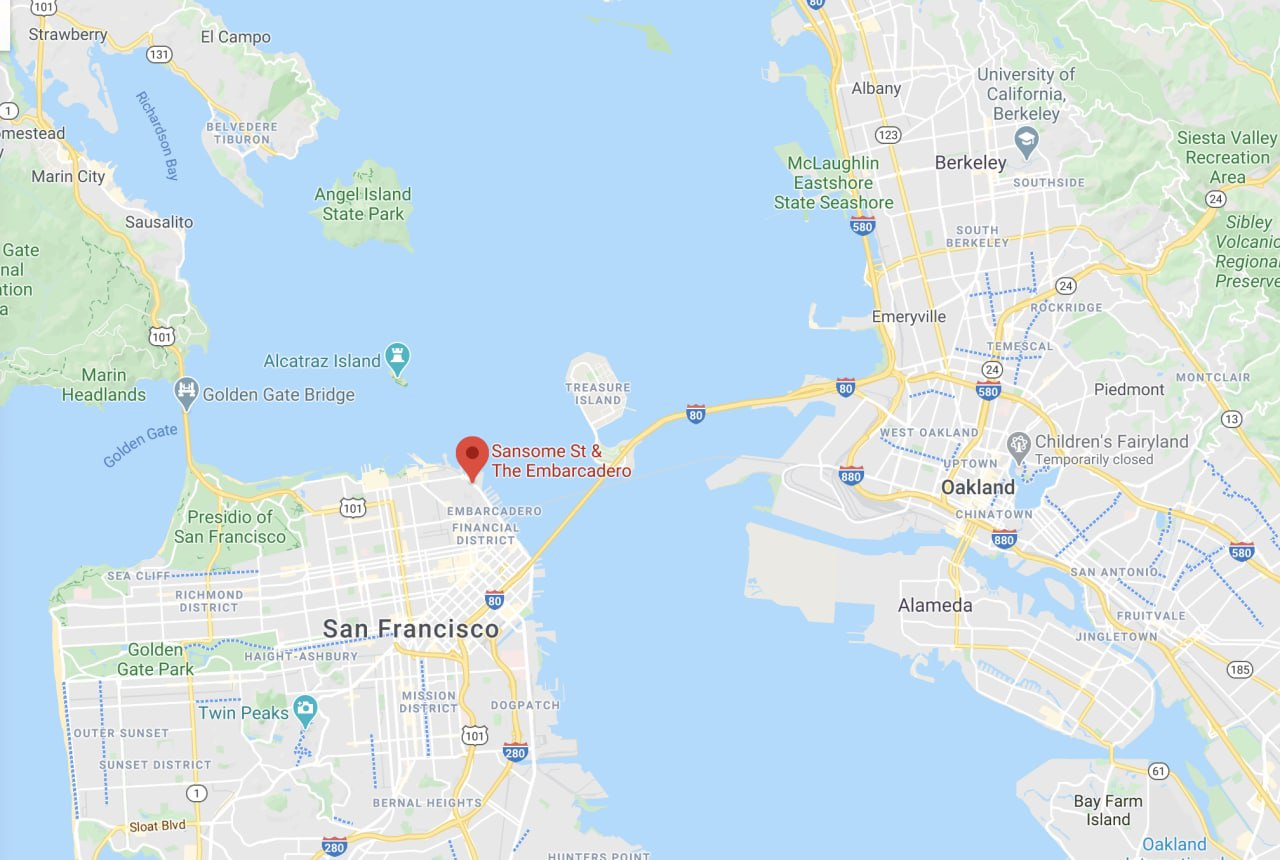

In [180]:
from IPython.display import Image
Image(filename='Embarcadero.png') 

In [181]:
data=ford_df

In [182]:
import folium as fm # Folium is a Python library used for visualizing geospatial data
import pandas as pd
import numpy as np
#number of rows of the data
n=data.start_station_latitude.count()

#saving the averages of the latitude and longitude
x0=data.start_station_latitude.sum()/n
y0=data.start_station_longitude.sum()/n

#printing the averages of the latitude and longitude 
print(x0,y0)
#making the actual map using the averages of the latitude and longitude 
m=fm.Map(location=[x0, y0],zoom_start=12)

start_station_latitude=data.start_station_latitude
start_station_longitude=data.start_station_longitude

for i in range (5):
    #printing the latitude and longitude of the ith row
    print([start_station_latitude[i],start_station_longitude[i]])
    #making a marker in the map with this  latitude and longitude
    fm.Marker(location=[start_station_latitude[i],start_station_longitude[i]],popup=(data.start_station_name[i] , i+1) ,tooltip="click for the runk of the point ").add_to(m)
m
end_station_latitude=data.end_station_latitude
end_station_longitude=data.end_station_longitude
for i in range (5):
    print([end_station_latitude[i],end_station_longitude[i]])
    fm.Marker(location=[end_station_latitude[i],end_station_longitude[i]],popup=(data.end_station_name[i], i+1),tooltip="click for the runk of the point ",icon=fm.Icon(color='red')).add_to(m)
    m
    
for i in range (5):
    path=[(start_station_latitude[i],start_station_longitude[i]),(end_station_latitude[i],end_station_longitude[i])]
    fm.PolyLine(path,color="black",popup=(data.duration_sec[i])).add_to(m)
fm.TileLayer('Stamen Terrain').add_to(m)
fm.TileLayer('Stamen Toner').add_to(m)
fm.TileLayer('Stamen Water Color').add_to(m)
fm.TileLayer('cartodbpositron').add_to(m)
fm.TileLayer('cartodbdark_matter').add_to(m)
fm.LayerControl().add_to(m)
m

37.771652603110034 -122.36392726512973
[37.776434819204745, -122.42624402046204]
[37.78487208436062, -122.40087568759915]
[37.8703477, -122.2677637]
[37.77452040113685, -122.4094493687153]
[37.8688126, -122.258764]
[37.7787677, -122.4159292]
[37.7662102, -122.4266136]
[37.8703477, -122.2677637]
[37.78389935708493, -122.4084448814392]
[37.8677892, -122.2658964]


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px


app = dash.Dash()

app.layout = html.Div([
    html.P("Names:"),
    dcc.Dropdown(
        id='names', 
        value='member_gender', 
        options=[{'value': x, 'label': x} 
                 for x in ['user_type', 'member_gender']],
        clearable=False
    ),
    html.P("Values:"),
    dcc.Dropdown(
        id='values', 
        value='duration_min', 
        options=[{'value': x, 'label': x} 
                 for x in ['duration_sec']],
        clearable=False
    ),
    dcc.Graph(id="pie-chart"),
])

@app.callback(
    Output("pie-chart", "figure"), 
    [Input("names", "value"), 
     Input("values", "value")])
def generate_chart(names, values):
    fig = px.pie(df, values=values, names=names)
    return fig

if __name__ == "__main__":
    app.run_server(debug=False)

In [88]:
app = dash.Dash(__name__)
days = df.start_day.unique()


app.layout = html.Div([
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": x, "value": x} for x in days],
        value=days[0],
        clearable=False,
    ),
    dcc.Graph(id="bar-chart"),
])

@app.callback(
    Output("bar-chart", "figure"), 
    [Input("dropdown", "value")])
def update_bar_chart(day):
    mask = df["start_day"] == day
    fig = px.bar(df[mask], x="member_gender", y="duration_sec", 
                 color="user_type", barmode="group")
    return fig

if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [2]:
app = dash.Dash(__name__)
months = df.start_month.unique()


app.layout = html.Div([
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": x, "value": x} for x in months],
        value=months[0],
        clearable=False,
    ),
    dcc.Graph(id="bar-chart"),
])

@app.callback(
    Output("bar-chart", "figure"), 
    [Input("dropdown", "value")])
def update_bar_chart(month):
    mask = df["start_month"] == month
    fig = px.bar(df[mask], x="start_month", y="duration_min", 
                 color="user_type", barmode="group")
    return fig

if __name__ == "__main__":
    app.run_server(debug=False)


NameError: name 'df' is not defined

In [ ]:
app = dash.Dash(__name__)
genders = df.member_gender.unique()


app.layout = html.Div([
    dcc.Dropdown(
        id="dropdown",
        options=[{"label": x, "value": x} for x in genders],
        value=genders[0],
        clearable=False,
    ),
    dcc.Graph(id="bar-chart"),
])

@app.callback(
    Output("bar-chart", "figure"), 
    [Input("dropdown", "value")])
def update_bar_chart(gender):
    mask = df["member_gender"] == gender
    fig = px.bar(df[mask], x="member_gender", y="duration_min", 
                 color="user_type", barmode="group")
    return fig

if __name__ == "__main__":
    app.run_server(debug=False)


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  The multivariate exploration shows that, Subscribed Male riders are making more number of rides during the peak timeframes with respect to ride frequency. Its evident that bike ride frequency is totally depends on the riders characteristics Member gender, user type and member age. Whereas casual Customer Female riders are taking higher ride durations during the peak timeframes with respect to ride duration. 

### Were there any interesting or surprising interactions between features?

> Surprisingly, old age group riders are taking lower ride durations uniformly with younger age group riders for ride duration. Ride frequency and Ride duration has contradictory relationship towards bike riders characteristics. Relationship between time characteristics and ride duartion is totally differs from Relationship between time characteristics and peak frequency rides.